In [1]:
#Importing required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')

import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime
color = sns.color_palette()

In [2]:
cd C:\Users\sumar\Documents\Spring 2019\Practicum\AHA\Data\ShopHeart_Dataset3

[WinError 3] The system cannot find the path specified: 'C:\\Users\\sumar\\Documents\\Spring 2019\\Practicum\\AHA\\Data\\ShopHeart_Dataset3'
C:\Users\luche\OneDrive\UTD Courses\Sem-4\Practicum


In [3]:
df17 = pd.read_excel('Shopheart Transaction Revenue FY2017.xlsx')
df17.head(5)

,OrderID,CustomerID,OrderDate,OrderStatus,SubTotal,TaxesBilled,ShippingBilled,DiscountAmount,DiscountList,GrandTotal,...,BillAddressCountryCode,TotalWeight,ResidentialAddress,ServiceName,OrderItems,EnteredDate,OrderTime,ItemCount,CouponCode,AdCode
0,481285,388282,2016-08-20 16:29:00,Shipped,16.77,0.00,5.00,0.0,NaN,21.77,...,US,0.400,Y,USPS First-Class Mail Large Envelope,AHAXMT000505~Men's Distressed Running Heart T-...,2016-08-20 16:29:21,16:29:00,1,NaN,NaN
1,481290,297965,2016-08-20 18:44:00,Shipped,51.90,0.00,5.00,0.0,NaN,56.90,...,US,0.800,Y,USPS First-Class Mail Large Envelope,SH15086-S~Go Red Chevron Lace 3/4 Sleeve~1~31....,2016-08-20 18:44:21,18:44:00,2,NaN,NaN
2,481293,238065,2016-08-20 19:47:00,Shipped,79.00,3.79,9.96,15.8,20% off orders of $70 or more - AHA- AHASCHOOL,76.95,...,US,4.000,Y,USPS Priority Mail,SH15118~Seasons of Eating American Heart Lamin...,2016-08-20 19:47:28,19:47:00,2,AHASCHOOL,NaN
3,481299,388139,2016-08-20 21:45:00,Shipped,52.62,0.00,5.00,0.0,NaN,57.62,...,US,0.800,Y,USPS First-Class Mail Large Envelope,SH15084-XL~Go Red Swivel Performance Long slee...,2016-08-20 21:45:01,21:45:00,2,NaN,NaN
4,481312,388358,2016-08-21 01:30:00,Shipped,60.86,3.65,8.16,0.0,NaN,72.67,...,US,1.565,Y,USPS Priority Mail,SH14033~Glitter Heart & Torch Lapel Pin~1~4.95...,2016-08-21 01:29:45,01:30:00,6,NaN,NaN


In [4]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9299 entries, 0 to 9298
Data columns (total 38 columns):
OrderID                      9299 non-null int64
CustomerID                   9299 non-null int64
OrderDate                    9299 non-null datetime64[ns]
OrderStatus                  9299 non-null object
SubTotal                     9299 non-null float64
TaxesBilled                  9299 non-null float64
ShippingBilled               9299 non-null float64
DiscountAmount               9299 non-null float64
DiscountList                 1909 non-null object
GrandTotal                   9299 non-null float64
ShippingMethodUsed           9225 non-null object
ShipDate                     8355 non-null object
PaymentMethod                9119 non-null object
PaymentAmount                9119 non-null float64
PaymentDate                  9035 non-null datetime64[ns]
ApprovedTransactionsTotal    9119 non-null float64
CustomerReferredFromUrl      4136 non-null object
CustomerLandedOnUrl   

In [5]:
# check missing values for each column 
df17.isnull().sum().sort_values(ascending=False)

CouponCode                   7769
DiscountList                 7390
AdCode                       7170
CustomerReferredFromUrl      5163
ShipDate                      944
CustomerLandedOnUrl           441
PaymentDate                   264
PaymentMethod                 180
ApprovedTransactionsTotal     180
PaymentAmount                 180
ShippingMethodUsed             74
ServiceName                    74
BillAddressStateCode           19
ShipAddressStateCode            4
BillAddressZip                  1
ShipAddressZip                  1
OrderItems                      1
DiscountAmount                  0
ShippingBilled                  0
TaxesBilled                     0
GrandTotal                      0
SubTotal                        0
OrderStatus                     0
OrderDate                       0
CustomerID                      0
TrafficSource                   0
ShipAddressCity                 0
ShipAddressCountry              0
ShipAddressCountryCode          0
BillAddressCit

In [6]:
del df17['CouponCode']
del df17['DiscountList']
del df17['AdCode']
del df17['CustomerReferredFromUrl']
df17.head(5)

,OrderID,CustomerID,OrderDate,OrderStatus,SubTotal,TaxesBilled,ShippingBilled,DiscountAmount,GrandTotal,ShippingMethodUsed,...,BillAddressZip,BillAddressCountry,BillAddressCountryCode,TotalWeight,ResidentialAddress,ServiceName,OrderItems,EnteredDate,OrderTime,ItemCount
0,481285,388282,2016-08-20 16:29:00,Shipped,16.77,0.00,5.00,0.0,21.77,US Mail - First Class (not trackable),...,32833,United States,US,0.400,Y,USPS First-Class Mail Large Envelope,AHAXMT000505~Men's Distressed Running Heart T-...,2016-08-20 16:29:21,16:29:00,1
1,481290,297965,2016-08-20 18:44:00,Shipped,51.90,0.00,5.00,0.0,56.90,US Mail - First Class (not trackable),...,44483,United States,US,0.800,Y,USPS First-Class Mail Large Envelope,SH15086-S~Go Red Chevron Lace 3/4 Sleeve~1~31....,2016-08-20 18:44:21,18:44:00,2
2,481293,238065,2016-08-20 19:47:00,Shipped,79.00,3.79,9.96,15.8,76.95,US Mail Priority,...,49009,United States,US,4.000,Y,USPS Priority Mail,SH15118~Seasons of Eating American Heart Lamin...,2016-08-20 19:47:28,19:47:00,2
3,481299,388139,2016-08-20 21:45:00,Shipped,52.62,0.00,5.00,0.0,57.62,US Mail - First Class (not trackable),...,46510,United States,US,0.800,Y,USPS First-Class Mail Large Envelope,SH15084-XL~Go Red Swivel Performance Long slee...,2016-08-20 21:45:01,21:45:00,2
4,481312,388358,2016-08-21 01:30:00,Shipped,60.86,3.65,8.16,0.0,72.67,US Mail Priority,...,48187,United States,US,1.565,Y,USPS Priority Mail,SH14033~Glitter Heart & Torch Lapel Pin~1~4.95...,2016-08-21 01:29:45,01:30:00,6


In [7]:
df_new_17 = df17[['OrderID','CustomerID','OrderItems','OrderDate']]

In [8]:
# df_new without missing values
df_new_17 = df_new_17.dropna()

# check missing values for each column 
df_new_17.isnull().sum().sort_values(ascending=False)

OrderDate     0
OrderItems    0
CustomerID    0
OrderID       0
dtype: int64

In [9]:
df_new_17.head(5)

,OrderID,CustomerID,OrderItems,OrderDate
0,481285,388282,AHAXMT000505~Men's Distressed Running Heart T-...,2016-08-20 16:29:00
1,481290,297965,SH15086-S~Go Red Chevron Lace 3/4 Sleeve~1~31....,2016-08-20 18:44:00
2,481293,238065,SH15118~Seasons of Eating American Heart Lamin...,2016-08-20 19:47:00
3,481299,388139,SH15084-XL~Go Red Swivel Performance Long slee...,2016-08-20 21:45:00
4,481312,388358,SH14033~Glitter Heart & Torch Lapel Pin~1~4.95...,2016-08-21 01:30:00


In [10]:
df_new_17.shape

(9298, 4)

In [11]:
import numpy as np
from itertools import chain

In [12]:
# return list from series of comma-separated strings
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))

In [13]:
# calculate lengths of splits
lens = df_new_17['OrderItems'].str.split('|').map(len)

In [14]:
# create new dataframe, repeating or chaining as appropriate
res17 = pd.DataFrame({'OrderID': np.repeat(df_new_17['OrderID'], lens),
                      'CustomerID': np.repeat(df_new_17['CustomerID'], lens),
                    'OrderDate': np.repeat(df_new_17['OrderDate'], lens),
                    'OrderItems': chainer(df_new_17['OrderItems'])})

In [15]:
new = res17["OrderItems"].str.split("~", n = 8, expand = True) 
new.head(5)

,0,1,2,3,4,5,6,7
0,AHAXMT000505,Men's Distressed Running Heart T-Shirt,1,16.77,AHA,AHAXMT0005,Size: XL,
1,SH15086-S,Go Red Chevron Lace 3/4 Sleeve,1,31.95,Sanmar,DM444,Size: S,
1,SH14220-3XL,American Heart Men's Skeletal T-Shirt,1,19.95,Sanmar,DT6000,Size: 3XL,
2,SH15118,Seasons of Eating American Heart Laminated Tote,10,3.95,Instore Corporated,,,
2,SH15117,Go Red Scribble Hearts Laminated Tote,10,3.95,Instore Corporated,,,


In [16]:
res17['SKU'] = new[0]
res17['Product Name'] = new[1]
res17['Qty. Invoiced'] = new[2]
res17['Item Price'] = new[3]
del res17['OrderItems']

In [17]:
res17.head()

,OrderID,CustomerID,OrderDate,SKU,Product Name,Qty. Invoiced,Item Price
0,481285,388282,2016-08-20 16:29:00,AHAXMT000505,Men's Distressed Running Heart T-Shirt,1,16.77
1,481290,297965,2016-08-20 18:44:00,SH15086-S,Go Red Chevron Lace 3/4 Sleeve,1,31.95
1,481290,297965,2016-08-20 18:44:00,SH14220-3XL,American Heart Men's Skeletal T-Shirt,1,19.95
2,481293,238065,2016-08-20 19:47:00,SH15118,Seasons of Eating American Heart Laminated Tote,10,3.95
2,481293,238065,2016-08-20 19:47:00,SH15117,Go Red Scribble Hearts Laminated Tote,10,3.95


In [18]:
res17.loc[res17['OrderID'] == 481293]

,OrderID,CustomerID,OrderDate,SKU,Product Name,Qty. Invoiced,Item Price
2,481293,238065,2016-08-20 19:47:00,SH15118,Seasons of Eating American Heart Laminated Tote,10,3.95
2,481293,238065,2016-08-20 19:47:00,SH15117,Go Red Scribble Hearts Laminated Tote,10,3.95


In [19]:
df18 = pd.read_excel('Shopheart Transaction Revenue FY2018.xlsx')
df18.head(5)

,OrderID,CustomerID,OrderDate,OrderStatus,SubTotal,TaxesBilled,ShippingBilled,DiscountAmount,DiscountList,GrandTotal,...,ResidentialAddress,ShipmentNotification,ServiceName,OrderItems,IsGift,EnteredDate,OrderTime,ItemCount,CouponCode,AdCode
0,537427,471118,2017-07-15 12:29:00,Shipped,38.50,0.0,10.38,0.0,NaN,48.88,...,Y,Y,USPS Priority Mail,SH17004-L~CPR Anytime&#174; Kit - Infant~1~38....,False,2017-07-15 12:29:27,12:29:00,1,NaN,NaN
1,537433,471133,2017-07-15 15:23:00,Shipped,20.89,0.0,5.00,0.0,NaN,25.89,...,Y,Y,USPS First-Class Mail Large Envelope,SH14164~Go Red Stickers 50 Pack~2~5.97~AHA~SH1...,False,2017-07-15 15:22:41,15:23:00,2,NaN,NaN
2,537439,345823,2017-07-15 17:36:00,Shipped,17.95,0.0,5.00,0.0,NaN,22.95,...,Y,Y,USPS First-Class Mail Large Envelope,SH16068-L~Go Red Ladies' Tee~1~17.95~Advanced ...,False,2017-07-15 17:36:28,17:36:00,1,NaN,NaN
3,537448,471156,2017-07-15 20:02:00,Shipped,23.95,0.0,11.64,0.0,NaN,35.59,...,Y,Y,UPS Ground,SH14077~An Active Partnership for the Health o...,False,2017-07-15 20:02:08,20:02:00,1,NaN,NaN
4,537454,471175,2017-07-16 07:03:00,Shipped,37.90,0.0,15.56,0.0,NaN,53.46,...,Y,Y,UPS Ground,AHGONV0045~Recipes for the Heart Cookbook Maga...,False,2017-07-16 07:02:36,07:03:00,2,NaN,NaN


In [20]:
df_new_18 = df18[['OrderID','CustomerID','OrderItems','OrderDate']]

# df_new without missing values
df_new_18 = df_new_18.dropna()

# check missing values for each column 
df_new_18.isnull().sum().sort_values(ascending=False)

df_new_18.head(5)

,OrderID,CustomerID,OrderItems,OrderDate
0,537427,471118,SH17004-L~CPR Anytime&#174; Kit - Infant~1~38....,2017-07-15 12:29:00
1,537433,471133,SH14164~Go Red Stickers 50 Pack~2~5.97~AHA~SH1...,2017-07-15 15:23:00
2,537439,345823,SH16068-L~Go Red Ladies' Tee~1~17.95~Advanced ...,2017-07-15 17:36:00
3,537448,471156,SH14077~An Active Partnership for the Health o...,2017-07-15 20:02:00
4,537454,471175,AHGONV0045~Recipes for the Heart Cookbook Maga...,2017-07-16 07:03:00


In [21]:
# calculate lengths of splits
lens = df_new_18['OrderItems'].str.split('|').map(len)

In [22]:
# create new dataframe, repeating or chaining as appropriate
res18 = pd.DataFrame({'OrderID': np.repeat(df_new_18['OrderID'], lens),
                      'CustomerID': np.repeat(df_new_18['CustomerID'], lens),
                    'OrderDate': np.repeat(df_new_18['OrderDate'], lens),
                    'OrderItems': chainer(df_new_18['OrderItems'])})

In [23]:
res18.head(5)

,OrderID,CustomerID,OrderDate,OrderItems
0,537427,471118,2017-07-15 12:29:00,SH17004-L~CPR Anytime&#174; Kit - Infant~1~38....
1,537433,471133,2017-07-15 15:23:00,SH14164~Go Red Stickers 50 Pack~2~5.97~AHA~SH1...
1,537433,471133,2017-07-15 15:23:00,SH14194~Silver Glitter Red Dress Lapel Pin~1~8...
2,537439,345823,2017-07-15 17:36:00,SH16068-L~Go Red Ladies' Tee~1~17.95~Advanced ...
3,537448,471156,2017-07-15 20:02:00,SH14077~An Active Partnership for the Health o...


In [24]:
new = res18["OrderItems"].str.split("~", n = 9, expand = True) 

In [25]:
new.head(5)

,0,1,2,3,4,5,6,7
0,SH17004-L,CPR Anytime&#174; Kit - Infant,1,38.50,American Heart Association,901001,Skin Tone: Light,
1,SH14164,Go Red Stickers 50 Pack,2,5.97,AHA,SH14164,,
1,SH14194,Silver Glitter Red Dress Lapel Pin,1,8.95,CSanders,SH14194,,
2,SH16068-L,Go Red Ladies' Tee,1,17.95,Advanced Tex Screenprinting,6750VL,Size: L,
3,SH14077,An Active Partnership for the Health of Your H...,1,23.95,Krames Staywell,50-1711,,


In [26]:
res18['SKU'] = new[0]
res18['Product Name'] = new[1]
res18['Qty. Invoiced'] = new[2]
res18['Item Price'] = new[3]
del res18['OrderItems']

In [27]:
res18.head(5)

,OrderID,CustomerID,OrderDate,SKU,Product Name,Qty. Invoiced,Item Price
0,537427,471118,2017-07-15 12:29:00,SH17004-L,CPR Anytime&#174; Kit - Infant,1,38.50
1,537433,471133,2017-07-15 15:23:00,SH14164,Go Red Stickers 50 Pack,2,5.97
1,537433,471133,2017-07-15 15:23:00,SH14194,Silver Glitter Red Dress Lapel Pin,1,8.95
2,537439,345823,2017-07-15 17:36:00,SH16068-L,Go Red Ladies' Tee,1,17.95
3,537448,471156,2017-07-15 20:02:00,SH14077,An Active Partnership for the Health of Your H...,1,23.95


In [28]:
df19 = pd.read_excel('Shopheart Transaction Revenue FY2019 V2.xlsx')
df19.head(5)

,Order #,Customer ID,Order Status,Order Date,SKU,Product Name,Qty. Invoiced,Item Price,Donation,Subtotal,...,Zip Code,Qty. Ordered,Qty. Shipped,Grand Total (purchased),Total,Total incl. Tax,Invoiced,Tax Invoiced,Invoiced incl. Tax,Primary Category
0,AHA000000003,1474SHERCAL91403,complete,2018-07-31 16:26:04,SH17039,Healthy For Good Apron,2,19.95,0.00,39.90,...,91403,2,2.0,44.1250,39.90,39.90,39.90,0.0,39.90,Cooking
1,AHA000000003,1474SHERCAL91403,complete,2018-07-31 16:26:04,SH15026,Know and Go - Physical Activity Cards (25/Pack),1,6.95,0.00,6.95,...,91403,1,1.0,9.0625,6.95,6.95,6.95,0.0,6.95,Education
2,AHA000000003,1474SHERCAL91403,complete,2018-07-31 16:26:04,SH18043,Know and Go - High Blood Pressure Cards (25/Pack),1,6.95,0.00,6.95,...,91403,1,1.0,9.0625,6.95,6.95,6.95,0.0,6.95,Education
3,AHA000000004,23 ISACOMAI04072,complete,2018-07-31 18:36:21,SH17119,Hands-Only CPR Poster (Set of 5),1,15.95,0.05,15.95,...,04072,1,1.0,30.9000,15.95,15.95,15.95,0.0,15.95,Education
4,AHA000000005,1111CHICILL60605,complete,2018-07-31 18:46:26,SH17004-M,CPR Anytime Kit - Infant,4,38.50,0.00,154.00,...,60605,4,4.0,164.4000,154.00,154.00,154.00,0.0,154.00,Education


In [29]:
df_new_19 = df19[['Customer ID','Order Date','Order #','SKU','Product Name','Qty. Invoiced','Item Price']]

# df_new without missing values
df_new_19 = df_new_19.dropna()

# check missing values for each column 
df_new_19.isnull().sum().sort_values(ascending=False)

df_new_19.head(5)

,Customer ID,Order Date,Order #,SKU,Product Name,Qty. Invoiced,Item Price
0,1474SHERCAL91403,2018-07-31 16:26:04,AHA000000003,SH17039,Healthy For Good Apron,2,19.95
1,1474SHERCAL91403,2018-07-31 16:26:04,AHA000000003,SH15026,Know and Go - Physical Activity Cards (25/Pack),1,6.95
2,1474SHERCAL91403,2018-07-31 16:26:04,AHA000000003,SH18043,Know and Go - High Blood Pressure Cards (25/Pack),1,6.95
3,23 ISACOMAI04072,2018-07-31 18:36:21,AHA000000004,SH17119,Hands-Only CPR Poster (Set of 5),1,15.95
4,1111CHICILL60605,2018-07-31 18:46:26,AHA000000005,SH17004-M,CPR Anytime Kit - Infant,4,38.50


In [30]:
res19 = df_new_19.rename(columns={'Customer ID': 'CustomerID', 'Order Date': 'OrderDate','Order #':'OrderID'})

In [31]:
res19.head(5)

,CustomerID,OrderDate,OrderID,SKU,Product Name,Qty. Invoiced,Item Price
0,1474SHERCAL91403,2018-07-31 16:26:04,AHA000000003,SH17039,Healthy For Good Apron,2,19.95
1,1474SHERCAL91403,2018-07-31 16:26:04,AHA000000003,SH15026,Know and Go - Physical Activity Cards (25/Pack),1,6.95
2,1474SHERCAL91403,2018-07-31 16:26:04,AHA000000003,SH18043,Know and Go - High Blood Pressure Cards (25/Pack),1,6.95
3,23 ISACOMAI04072,2018-07-31 18:36:21,AHA000000004,SH17119,Hands-Only CPR Poster (Set of 5),1,15.95
4,1111CHICILL60605,2018-07-31 18:46:26,AHA000000005,SH17004-M,CPR Anytime Kit - Infant,4,38.50


In [32]:
data = pd.concat([res17, res18, res19])
data = data.rename(columns={'Qty. Invoiced': 'Quantity', 'Product Name': 'ProductName','Item Price':'UnitPrice'})
data.head(5)

,CustomerID,UnitPrice,OrderDate,OrderID,ProductName,Quantity,SKU
0,388282,16.77,2016-08-20 16:29:00,481285,Men's Distressed Running Heart T-Shirt,1,AHAXMT000505
1,297965,31.95,2016-08-20 18:44:00,481290,Go Red Chevron Lace 3/4 Sleeve,1,SH15086-S
1,297965,19.95,2016-08-20 18:44:00,481290,American Heart Men's Skeletal T-Shirt,1,SH14220-3XL
2,238065,3.95,2016-08-20 19:47:00,481293,Seasons of Eating American Heart Laminated Tote,10,SH15118
2,238065,3.95,2016-08-20 19:47:00,481293,Go Red Scribble Hearts Laminated Tote,10,SH15117


In [33]:
data.dropna(inplace = True)
data["Quantity"]=data['Quantity'].astype(int)
data["UnitPrice"]= data['UnitPrice'].astype(float)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44428 entries, 0 to 3903
Data columns (total 7 columns):
CustomerID     44428 non-null object
UnitPrice      44428 non-null float64
OrderDate      44428 non-null object
OrderID        44428 non-null object
ProductName    44428 non-null object
Quantity       44428 non-null int32
SKU            44428 non-null object
dtypes: float64(1), int32(1), object(5)
memory usage: 2.5+ MB


In [35]:
data['Total_Price']=data['Quantity']*data['UnitPrice']

In [36]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
data['YearMonth'] = data['OrderDate'].apply(lambda x:x.strftime('%Y%m'))   

In [37]:
data.head(5)

,CustomerID,UnitPrice,OrderDate,OrderID,ProductName,Quantity,SKU,Total_Price,YearMonth
0,388282,16.77,2016-08-20 16:29:00,481285,Men's Distressed Running Heart T-Shirt,1,AHAXMT000505,16.77,201608
1,297965,31.95,2016-08-20 18:44:00,481290,Go Red Chevron Lace 3/4 Sleeve,1,SH15086-S,31.95,201608
1,297965,19.95,2016-08-20 18:44:00,481290,American Heart Men's Skeletal T-Shirt,1,SH14220-3XL,19.95,201608
2,238065,3.95,2016-08-20 19:47:00,481293,Seasons of Eating American Heart Laminated Tote,10,SH15118,39.50,201608
2,238065,3.95,2016-08-20 19:47:00,481293,Go Red Scribble Hearts Laminated Tote,10,SH15117,39.50,201608


In [38]:
data1 = data[['CustomerID','YearMonth']].drop_duplicates()

In [39]:
data["YearMonth"]= data['YearMonth'].astype(float)
data.describe()

,UnitPrice,Quantity,Total_Price,YearMonth
count,44428.000000,44428.000000,44428.000000,44428.000000
mean,16.798516,3.484739,31.916798,201739.258441
std,13.193881,24.995784,145.715817,64.830028
min,0.000000,0.000000,0.000000,201607.000000
25%,5.950000,1.000000,8.970000,201701.000000
50%,13.670000,1.000000,19.470000,201710.000000
75%,24.950000,2.000000,29.950000,201801.000000
max,179.950000,2000.000000,13475.000000,201901.000000


In [40]:
data['YearMonth'] = pd.to_numeric(data['YearMonth'], errors='coerce')


In [41]:
def f(row):
 row['YearMonth'] = int(row['YearMonth'])
 if row['YearMonth'] > 201806:
    val = 5
 elif row['YearMonth'] <= 201806 and row['YearMonth'] > 201801:
    val = 4
 elif row['YearMonth'] <= 201801 and row['YearMonth'] > 201706:
    val = 3
 elif row['YearMonth'] <= 201706 and row['YearMonth'] > 201701:
    val = 2
 else:
    val = 1
 return val
data['Recency_Flag'] = data.apply(f, axis=1)
data1 = data.groupby('CustomerID',as_index=False)['Recency_Flag'].max()

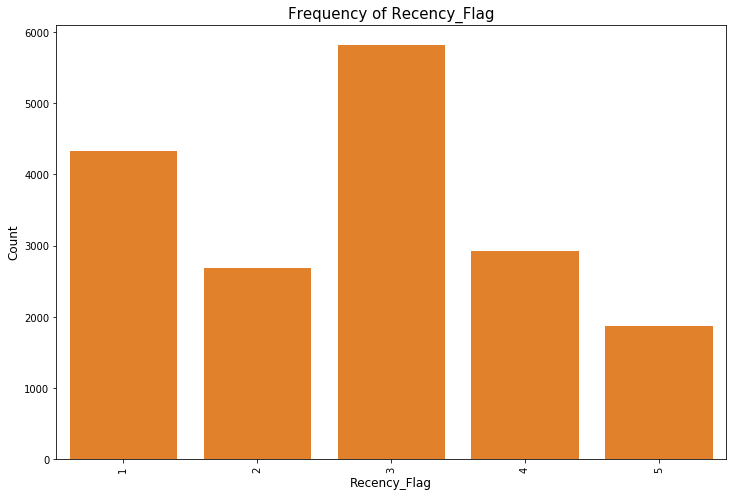

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x='Recency_Flag', data=data1, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Recency_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Recency_Flag', fontsize=15)
plt.show()

In [43]:
Cust_freq=data[['OrderID','CustomerID']].drop_duplicates()
#Calculating the count of unique purchase for each customer
Cust_freq_count=Cust_freq.groupby('CustomerID')['OrderID'].aggregate('count').reset_index().sort_values('OrderID', ascending=False)
Cust_freq_count.head()

,CustomerID,OrderID
3037,399528,42
57,235031,15
1226,328515,14
2424,388063,14
704,256483,13


In [44]:
unique_invoice=Cust_freq_count[['OrderID']].drop_duplicates()

In [45]:
# Dividing in 5 equal parts
unique_invoice['Freqency_Band'] = pd.qcut(unique_invoice['OrderID'], 5)
unique_invoice=unique_invoice[['Freqency_Band']].drop_duplicates()
unique_invoice

,Freqency_Band
3037,"(13.0, 42.0]"
704,"(10.0, 13.0]"
9893,"(7.0, 10.0]"
621,"(4.0, 7.0]"
1214,"(0.999, 4.0]"


In [46]:
def f(row):
    if row['OrderID'] <= 1:
        val = 1
    elif row['OrderID'] > 1 and row['OrderID'] <= 2:
        val = 2
    elif row['OrderID'] > 2 and row['OrderID'] <= 3:
        val = 3
    elif row['OrderID'] > 3 and row['OrderID'] <= 5:
        val = 4
    else:
        val = 5
    return val
Cust_freq_count['Freq_Flag'] = Cust_freq_count.apply(f, axis=1)


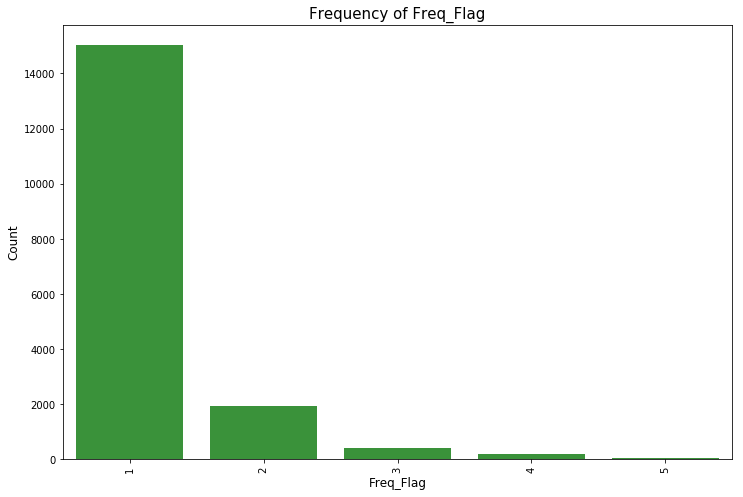

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(x='Freq_Flag', data=Cust_freq_count, color=color[2])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Freq_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Freq_Flag', fontsize=15)
plt.show()

In [48]:
Cust_freq_count

,CustomerID,OrderID,Freq_Flag
3037,399528,42,5
57,235031,15,5
1226,328515,14,5
2424,388063,14,5
704,256483,13,5
2725,393715,12,5
2561,391019,11,5
4235,426354,11,5
9893,487800,10,5
70,236227,9,5


In [49]:
Cust_monetary = data.groupby(['CustomerID'])['Total_Price'].aggregate('sum').reset_index().sort_values('Total_Price', ascending=False)

In [50]:
unique_price=Cust_monetary[['Total_Price']].drop_duplicates()
unique_price=unique_price[unique_price['Total_Price'] > 0]
unique_price['monetary_Band'] = pd.qcut(unique_price['Total_Price'], 5)
unique_price=unique_price[['monetary_Band']].drop_duplicates()
unique_price

,monetary_Band
8330,"(181.52, 40874.6]"
14931,"(103.3, 181.52]"
13184,"(66.85, 103.3]"
16095,"(41.98, 66.85]"
12323,"(0.179, 41.98]"


In [51]:
def f(row):
    if row['Total_Price'] <= 41.98:
        val = 1
    elif row['Total_Price'] > 41.98 and row['Total_Price'] <= 66.85:
        val = 2
    elif row['Total_Price'] > 66.85 and row['Total_Price'] <= 103.3:
        val = 3
    elif row['Total_Price'] > 103.3 and row['Total_Price'] <= 181.52:
        val = 4
    else:
        val = 5
    return val
Cust_monetary['Monetary_Flag'] = Cust_monetary.apply(f, axis=1)

In [52]:
Cust_monetary.to_excel('Cust_monetary.xlsx')

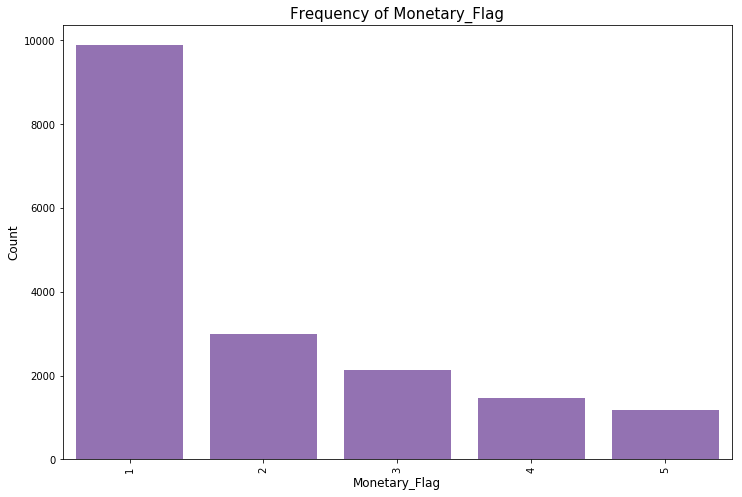

In [53]:
plt.figure(figsize=(12,8))
sns.countplot(x='Monetary_Flag', data=Cust_monetary, color=color[4])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Monetary_Flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of Monetary_Flag', fontsize=15)
plt.show()

In [65]:
Cust_freq_count.to_excel('freq_flag_final.xlsx')

In [66]:
data1.to_excel('recency_flag_final.xlsx')

In [67]:
Cust_monetary.to_excel('monetary_flag_final.xlsx')

In [64]:
data.head()

,CustomerID,UnitPrice,OrderDate,OrderID,ProductName,Quantity,SKU,Total_Price,YearMonth
0,388282,16.77,2016-08-20 16:29:00,481285,Men's Distressed Running Heart T-Shirt,1,AHAXMT000505,16.77,201608.0
1,297965,31.95,2016-08-20 18:44:00,481290,Go Red Chevron Lace 3/4 Sleeve,1,SH15086-S,31.95,201608.0
1,297965,19.95,2016-08-20 18:44:00,481290,American Heart Men's Skeletal T-Shirt,1,SH14220-3XL,19.95,201608.0
2,238065,3.95,2016-08-20 19:47:00,481293,Seasons of Eating American Heart Laminated Tote,10,SH15118,39.50,201608.0
2,238065,3.95,2016-08-20 19:47:00,481293,Go Red Scribble Hearts Laminated Tote,10,SH15117,39.50,201608.0


In [56]:
data.to_excel('data.xlsx')

In [57]:
del data['Recency_Flag']

In [58]:
data.head(5)

,CustomerID,UnitPrice,OrderDate,OrderID,ProductName,Quantity,SKU,Total_Price,YearMonth
0,388282,16.77,2016-08-20 16:29:00,481285,Men's Distressed Running Heart T-Shirt,1,AHAXMT000505,16.77,201608.0
1,297965,31.95,2016-08-20 18:44:00,481290,Go Red Chevron Lace 3/4 Sleeve,1,SH15086-S,31.95,201608.0
1,297965,19.95,2016-08-20 18:44:00,481290,American Heart Men's Skeletal T-Shirt,1,SH14220-3XL,19.95,201608.0
2,238065,3.95,2016-08-20 19:47:00,481293,Seasons of Eating American Heart Laminated Tote,10,SH15118,39.50,201608.0
2,238065,3.95,2016-08-20 19:47:00,481293,Go Red Scribble Hearts Laminated Tote,10,SH15117,39.50,201608.0


In [59]:
data.to_excel('data_final.xlsx')